# Tensorflow Image Recognition Hanbok vs Kimono design style


# 1) Data Preparation Part using Google Drive


### Connect My Google Drive

In [ ]:
# Google Drive Load
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2)  Training part using TensorFlow and pre-trained model
## Trarining My Recognition Model Using Tensorflow and Pre-trained Model


### Load Python Library and TensorFlow

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import os.path
import sys
#!pip install tensorflow==2.9.2
import tensorflow as tf
print(tf.__version__)


2.9.2


### Set Training Parameter and Run Training Code
#### See below.

--image_dir="/content/drive/My Drive/research/design_style/training_set" **<<< 학습 데이터가 있는 폴더의 위치 입력**  \


--how_many_training_steps 50 **<<< 학습을 몇번이나 진행할 것 인지 입력** \

--model_dir="/content/drive/My Drive/research/design_style/imagenet" **<<< 활용할 pre-trained 모델 위치 입력** \

--summaries_dir="/content/drive/My Drive/research/design_style/training_summaries/chair" **<<< 학습 log 파일을 저장할 폴더 위치 입력** \


--output_graph="/content/drive/My Drive/research/design_style/design_style.pb" **<<< 학습 완료 모델 저장 위치 입력** \

--output_labels="/content/drive/My Drive/research/design_style/design_style.txt" **<<< 학습 모델의 labels 정보 저장 위치 입력** \

--bottleneck_dir="/content/drive/My Drive/research/design_style/design_style"  **<<< 학습과정에서 생성되는 bottleneck data를 저장할 폴더 위치 입력** \



In [ ]:
!nvidia-smi

Mon Jul 22 14:52:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!apt-get install -y cuda

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cpp-12 cuda-12-5 cuda-cccl-12-5 cuda-command-line-tools-12-5 cuda-compiler-12-5 cuda-crt-12-5
  cuda-cudart-12-5 cuda-cudart-dev-12-5 cuda-cuobjdump-12-5 cuda-cupti-12-5 cuda-cupti-dev-12-5
  cuda-cuxxfilt-12-5 cuda-demo-suite-12-5 cuda-documentation-12-5 cuda-driver-dev-12-5 cuda-drivers
  cuda-drivers-555 cuda-gdb-12-5 cuda-libraries-12-5 cuda-libraries-dev-12-5 cuda-nsight-12-5
  cuda-nsight-compute-12-5 cuda-nsight-systems-12-5 cuda-nvcc-12-5 cuda-nvdisasm-12-5
  cuda-nvml-dev-12-5 cuda-nvprof-12-5 cuda-nvprune-12-5 cuda-nvrtc-12-5 cuda-nvrtc-dev-12-5
  cuda-nvtx-12-5 cuda-nvvm-12-5 cuda-nvvp-12-5 cuda-opencl-12-5 cuda-opencl-dev-12-5
  cuda-profiler-api-12-5 cuda-runtime-12-5 cuda-sanitizer-12-5 cuda-toolkit-12-5
  cuda-toolkit-12-5-config-common cuda-tools-12-5 cuda-visual-tools-12-5 dctrl-tools default-jre
  default-jre-headless 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import os
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda/lib64:'

In [ ]:
# This code is for converting to JPEG
import os
from PIL import Image

def convert_images_to_jpeg(image_dir):
    for root, _, files in os.walk(image_dir):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    if img.format not in ['JPEG', 'PNG', 'GIF', 'BMP']:
                        # Convert to JPEG
                        rgb_img = img.convert('RGB')
                        new_file_path = os.path.splitext(file_path)[0] + ".jpg"
                        rgb_img.save(new_file_path, format='JPEG')
                        os.remove(file_path)
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

image_dir = "/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/training_set"
convert_images_to_jpeg(image_dir)


In [ ]:
!python "/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/retrain.py" \
--image_dir="/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/training_set" \
--how_many_training_steps 300 \
--learning_rate 0.001 \
--model_dir="/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/imagenet" \
--summaries_dir="/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/design_style" \
--output_graph="/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/design_style.pb" \
--output_labels="/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/design_style.txt" \
--bottleneck_dir="/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/bottleneck_design_style"


2024-07-22 14:56:22.217508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
Instructions for updating:
non-resource variables are not supported in the long term
2024-07-22 14:56:24.661547: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2024-07-22 14:56:24.661577: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
Instructions for updating:
Use tf.gfile.GFile.
W0722 14:56:26.019055 137800738460800 deprecation.py:350] From /content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/retrain.py:252: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprec

# 3) Prection part using my trained model

### Define Image Display

In [ ]:
def display_image(file_path):
    if os.path.exists(file_path):
        img = cv2.imread(file_path)
        show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(show_img)
    else:
        print('failed to open file')

### Load my Image

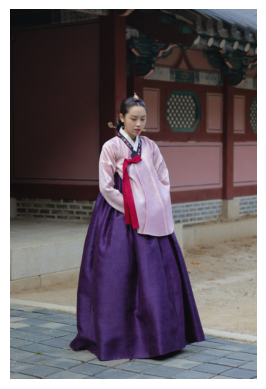

In [ ]:
my_image_path = "/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/testing_set/test1.jpeg"
display_image(my_image_path)

### Define Prediction Function

In [ ]:
def prediction (model_name, image_path):
    # display input image
    display_image(my_image_path)
    image_data= tf.io.gfile.GFile(image_path, 'rb').read()

    # get model labeling data(.txt)
    label_txt = model_name[:-3] + ".txt"
    label_lines = [line.rstrip() for line in tf.io.gfile.GFile(label_txt)]

    # run predction
    with tf.io.gfile.GFile(model_name,'rb')as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
        _=tf.compat.v1.import_graph_def(graph_def,name='')

    with tf.compat.v1.Session() as sess:
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

        predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0':image_data})

        top_k= predictions[0].argsort()[-len(predictions[0]):][::-1]

    for node_id in top_k:
        human_string = label_lines[node_id]
        score = predictions[0][node_id]
        print('%s(score = %.5f)'% (human_string,score))


## Run Prediction

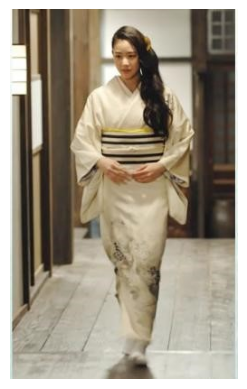

Predictions for image: /content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/testing_set/test4.jpeg
kimono (score = 0.85775)
hanbok (score = 0.14225)




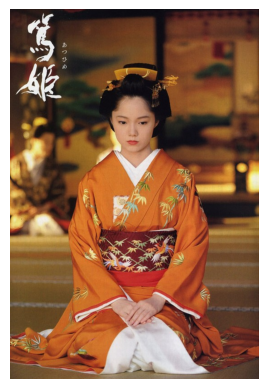

Predictions for image: /content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/testing_set/test3.jpeg
kimono (score = 0.89086)
hanbok (score = 0.10914)




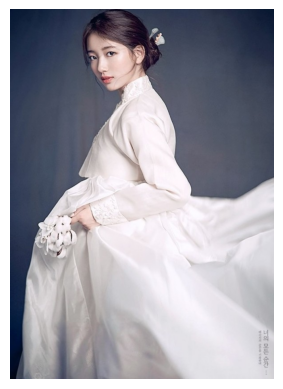

Predictions for image: /content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/testing_set/test2.jpeg
hanbok (score = 0.87671)
kimono (score = 0.12329)




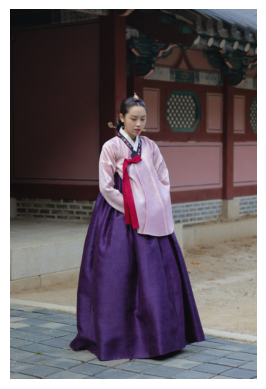

Predictions for image: /content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/testing_set/test1.jpeg
hanbok (score = 0.85296)
kimono (score = 0.14704)




In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

def display_image(file_path):
    if os.path.exists(file_path):
        img = cv2.imread(file_path)
        show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(show_img)
        plt.axis('off')  # No axis
        plt.show()
    else:
        print('failed to open file')

def prediction(model_name, image_path):
    if os.path.isdir(image_path):
        # If it's a directory, perform predictions on all image files
        image_files = [f for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]
        for image_file in image_files:
            single_image_path = os.path.join(image_path, image_file)
            perform_prediction(model_name, single_image_path)
    elif os.path.isfile(image_path):
        # If it is a file,
        perform_prediction(model_name, image_path)
    else:
        print("The provided path is neither a file nor a directory.")

def perform_prediction(model_name, image_path):
    # display input image
    display_image(image_path)
    image_data = tf.io.gfile.GFile(image_path, 'rb').read()

    # get model labeling data(.txt)
    label_txt = model_name.replace(".pb", ".txt")
    if not os.path.exists(label_txt):
        print(f"Label file {label_txt} does not exist.")
        return
    with open(label_txt) as f:
        label_lines = f.read().splitlines()

    # run prediction
    with tf.io.gfile.GFile(model_name, 'rb') as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.compat.v1.import_graph_def(graph_def, name='')

    with tf.compat.v1.Session() as sess:
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

        predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})

        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]

    print(f"Predictions for image: {image_path}")
    for node_id in top_k:
        human_string = label_lines[node_id]
        score = predictions[0][node_id]
        print('%s (score = %.5f)' % (human_string, score))
    print("\n")

model_name = '/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/design_style.pb'
my_image_path = '/content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/testing_set'
prediction(model_name, my_image_path)


In [ ]:
#prediction("/content/drive/MyDrive/AI&Design(YISS)//content/drive/MyDrive/AI&Design(YISS)/Final Project (Option 1)/design_style.pb", my_image_path)